vgg16
optimiser-adam
lr-0.001

In [1]:
import cv2
import numpy as np
import glob
import pickle
#from sklearn.externals import joblib
from keras.applications.vgg16 import preprocess_input
from sklearn import preprocessing
from tensorflow import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import glob
import keras
from keras.models       import Model
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet121
from keras.models import Model
import glob
from keras.applications.vgg19 import VGG19


In [6]:
np.random.seed(10)

In [2]:
imgs=[]
final_output_84_84=[]

lables=[]
for filefilepath in glob.iglob('IITD Database - IIT Delhi/*/output/*'):
    #print(filefilepath)
    
    if filefilepath[-1] == 'p':
        
        
        #img	= cv2.imread(filefilepath)
        imgs_colored=cv2.imread(filefilepath)
        filefilepath=filefilepath[37:-41]
        #print(filefilepath)
        #print(imgs_colored)
        #filefilepath=filefilepath[26:]
        #print(filefilepath)
        label=filefilepath[:3]
        #print(label)
        imgs.append([imgs_colored,int(label)])
        #filefilepath=filefilepath[40:-41]
        

In [3]:
final_output_84_84=[]
lables=[]
for i,j in imgs:
        final_output_84_84.append(i)
        lables.append(j)

In [4]:
print(len(final_output_84_84))
print(len(lables))


24640
24640


In [5]:
imgs_colored.shape

(240, 320, 3)

In [12]:
img_size=(320,240)

In [ ]:
final_output_84_84[0].shape

In [6]:
final_output_84_84=np.array(final_output_84_84)
lables=np.array(lables)

In [7]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()

le.fit(lables)
y=le.transform(lables)

In [18]:
final_output_84_84.shape

(24640, 240, 320, 3)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import svm

(X_train, X_test, y_train, y_test) = train_test_split(final_output_84_84, y,test_size=0.3, random_state=1250)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [29]:
final_output_84_84=np.load('file_name.npy')

In [10]:

from keras.models       import Model
from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from keras.applications.xception import Xception

#original_model = VGG19(include_top=False, input_shape=(480, 640, 3))
#original_model = DenseNet201(include_top=False,input_shape=(480,640,3))
#original_model = InceptionV3(include_top=False,input_shape=(320,240,3))
#original_model = InceptionResNetV2(include_top=False)
#original_model = Xception(include_top=False)

#bottleneck_input  = original_model.get_layer(index=0).input
#bottleneck_output = original_model.get_layer(index=-59).output
#bottleneck_model  = Model(inputs=bottleneck_input,  outputs=bottleneck_output)
#original_model.summary()
#bottleneck_model.summary()

In [22]:

#bottleneck_model = InceptionV3(include_top=False)
#Inception.summary()

In [11]:
'''
bottleneck_model    = VGG19(include_top=False, input_shape=(320,240,3))
bottleneck_model.summary()
'''
bottleneck_model   = VGG16(weights='imagenet',include_top=False,input_shape=(240, 320, 3))
bottleneck_model.summary()


58900480/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 320, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 160, 128)     147584    
______________________________________________________________

In [ ]:
train_feature_extractor=bottleneck_model.predict(X_train)

In [12]:
X_train=np.array(X_train)/255

#### X_train.shape

In [13]:
from sklearn.metrics import accuracy_score
bottelneck_features[2].shape

NameError: name 'bottelneck_features' is not defined

In [14]:
train_feature_extractor=bottleneck_model.predict(X_train)


In [17]:
train_features = train_feature_extractor.reshape(train_feature_extractor.shape[0], -1)


In [38]:
train_features.shape

(17248, 35840)

In [15]:
test_feature_extractor=bottleneck_model.predict(X_test)


In [19]:
test_features = test_feature_extractor.reshape(test_feature_extractor.shape[0], -1)


In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cum variance')

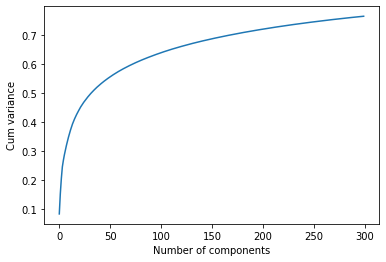

In [22]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=300) #
pca_test.fit(train_features)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum variance")

In [23]:
n_PCA_components = 300
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(train_features)
test_PCA = pca.transform(test_features)

In [29]:
train_PCA.shape

(17248, 300)

In [42]:

from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers


model = Sequential()
#model.add(Flatten(input_shape=shapee))
model.add(Flatten(input_shape=(n_PCA_components,)))#4, 6, 512 add it back
#model.add(Dense(500, activation='relu'))
#model.add(Dropout(0.8))
model.add(Dense(224, activation='softmax'))
#sgd = optimizers.SGD(learning_rate=0.1)
adam = optimizers.Adam(learning_rate=0.0001)


model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 224)               67424     
Total params: 67,424
Trainable params: 67,424
Non-trainable params: 0
_________________________________________________________________


In [35]:
import datetime 

In [43]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='casia_interval_dense_net_0.2_adam.hdf5', verbose=1, save_best_only=True)
#X_train, X_test, y_train, y_test
start=datetime.datetime.now()
history=model.fit(train_PCA,y_train_one_hot,epochs=5)
end=datetime.datetime.now()
print('total execution time with pca=',end-start)

Epoch 1/5
539/539 [==============================] - 2s 3ms/step - loss: 2.7001 - categorical_accuracy: 0.5380
Epoch 2/5
539/539 [==============================] - 1s 3ms/step - loss: 0.4503 - categorical_accuracy: 0.9283
Epoch 3/5
539/539 [==============================] - 2s 3ms/step - loss: 0.1879 - categorical_accuracy: 0.9780
Epoch 4/5
539/539 [==============================] - 1s 3ms/step - loss: 0.0943 - categorical_accuracy: 0.9922
Epoch 5/5
539/539 [==============================] - 1s 3ms/step - loss: 0.0514 - categorical_accuracy: 0.9983
total execution time with pca= 0:00:07.514553


dict_keys(['loss', 'categorical_accuracy'])


KeyError: 'val_categorical_accuracy'

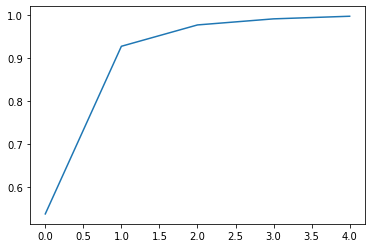

In [44]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model.save('iitdvgg19.h5')

In [24]:
type(X_train)

numpy.ndarray

In [22]:
len(y)

24640

In [23]:
len(X)

NameError: name 'X' is not defined

In [27]:
y.shape

(24640, 225)

In [6]:
import numpy as np

In [5]:
final_output_84_84=np.array(final_output_84_84)

In [39]:
y


array([  0,   0,   0, ..., 223, 223, 223], dtype=int64)